<a href="https://colab.research.google.com/github/srinath9121/Airline-Passenger-Satisfaction/blob/main/Copy_of_airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = "/content/Airplane.csv"
df = pd.read_csv('/content/Airplane.csv')


df_head = df.head()

df_head

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.shape

(103904, 25)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [ ]:
df.shape

(103904, 23)

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)


/tmp/ipython-input-10-2584395854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
for col in df:
  print(f" {col} = {df[col].unique()}")

 Gender = ['Male' 'Female']
 Customer Type = ['Loyal Customer' 'disloyal Customer']
 Age = [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
 Type of Travel = ['Personal Travel' 'Business travel']
 Class = ['Eco Plus' 'Business' 'Eco']
 Flight Distance = [ 460  235 1142 ...  974 1479  400]
 Inflight wifi service = [3 2 4 1 5 0]
 Departure/Arrival time convenient = [4 2 5 3 1 0]
 Ease of Online booking = [3 2 5 4 1 0]
 Gate location = [1 3 2 5 4 0]
 Food and drink = [5 1 2 4 3 0]
 Online boarding = [3 5 2 1 4 0]
 Seat comfort = [5 1 2 3 4 0]
 Inflight entertainment = [5 1 2 3 4 0]
 On-board service = [4 1 2 3 5 0]
 Leg room service = [3 5 4 2 1 0]
 Baggage handling = [4 3 5 1 2]
 Checkin service = [4 1 3 5 2 0]
 Inflight service = [5 4 3 1 2 0]
 Cleanliness = [5 1 2 3 4 0]
 Departure Delay in Minutes = [  25  

In [ ]:
le = LabelEncoder()
for col in ['Gender', 'Customer Type', 'Type of Travel']:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
data_dummies = pd.get_dummies(df['Class'], prefix='Class')
data_dummies

,Class_Business,Class_Eco,Class_Eco Plus
0,False,False,True
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
103899,False,True,False
103900,True,False,False
103901,True,False,False
103902,False,True,False


In [ ]:
data_dummies=data_dummies.astype(int)
data_dummies

,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,0,0
103902,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
data = pd.concat([df, data_dummies], axis=1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13,1,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,0,0,1
1,1,1,25,0,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,1,0,0
2,0,0,26,0,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,1,0,0
3,0,0,25,0,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,1,0,0
4,1,0,61,0,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,Eco,192,2,1,2,3,...,4,2,3,2,3,0.0,neutral or dissatisfied,0,1,0
103900,1,0,49,0,Business,2347,4,4,4,4,...,5,5,5,4,0,0.0,satisfied,1,0,0
103901,1,1,30,0,Business,1995,1,1,1,3,...,4,5,5,4,7,14.0,neutral or dissatisfied,1,0,0
103902,0,1,22,0,Eco,1000,1,1,1,5,...,1,5,4,1,0,0.0,neutral or dissatisfied,0,1,0


In [ ]:
df=data.drop(columns=['Class'])
df

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18.0,neutral or dissatisfied,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6.0,neutral or dissatisfied,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,satisfied,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9.0,neutral or dissatisfied,1,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0.0,satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,192,2,1,2,3,2,...,4,2,3,2,3,0.0,neutral or dissatisfied,0,1,0
103900,1,0,49,0,2347,4,4,4,4,2,...,5,5,5,4,0,0.0,satisfied,1,0,0
103901,1,1,30,0,1995,1,1,1,3,4,...,4,5,5,4,7,14.0,neutral or dissatisfied,1,0,0
103902,0,1,22,0,1000,1,1,1,5,1,...,1,5,4,1,0,0.0,neutral or dissatisfied,0,1,0


In [ ]:
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  int64  
 11  Seat comfort                       1039

In [ ]:
# prompt: round of the values of Arrival Delay in Minutes to int

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].round().astype(int)
print(df['Arrival Delay in Minutes'].head())

0    18
1     6
2     0
3     9
4     0
Name: Arrival Delay in Minutes, dtype: int64


In [ ]:
df.head(100)

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,32,0,1042,4,1,1,1,4,...,1,5,2,4,35,34,1,0,1,0
96,0,0,39,1,1773,4,5,4,5,5,...,3,3,1,5,14,18,0,0,1,0
97,1,0,19,1,342,3,1,3,2,3,...,3,1,3,3,0,0,0,1,0,0
98,0,0,15,1,297,1,5,1,3,5,...,1,3,4,5,67,62,0,0,0,1


from matplotlib import pyplot as plt
_df_0['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Customer Type'].plot(kind='hist', bins=20, title='Customer Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Type of Travel'].plot(kind='hist', bins=20, title='Type of Travel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Gender', y='Customer Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Customer Type', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='Type of Travel', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Type of Travel', y='Flight Distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Customer Type'].plot(kind='line', figsize=(8, 4), title='Customer Type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Type of Travel'].plot(kind='line', figsize=(8, 4), title='Type of Travel')
plt.gca().spines[['top', 'right']].set_visible(False)

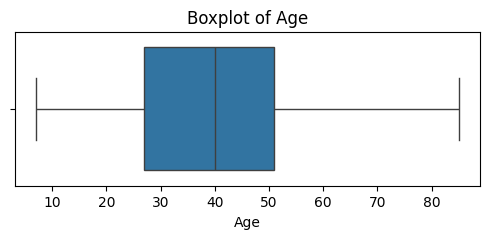

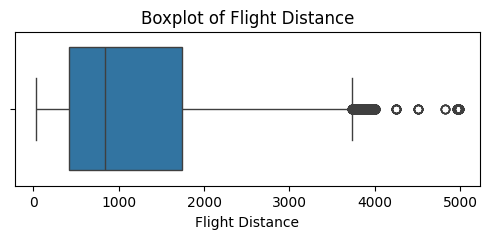

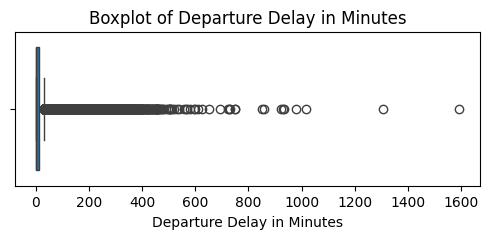

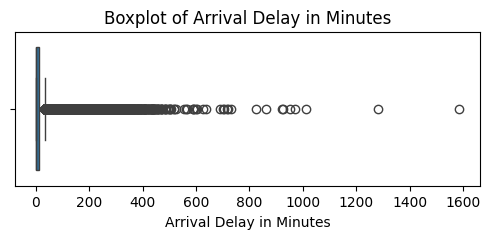

In [ ]:
cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
df.shape

(103904, 25)

In [ ]:
columns_to_check = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")

Outliers removed from Flight Distance
Outliers removed from Departure Delay in Minutes
Outliers removed from Arrival Delay in Minutes


In [ ]:
df.shape

(45265, 25)

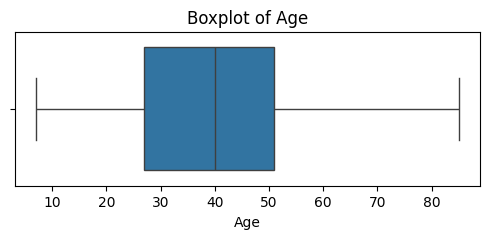

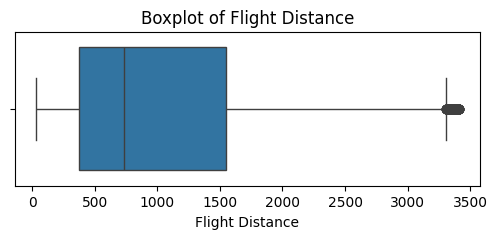

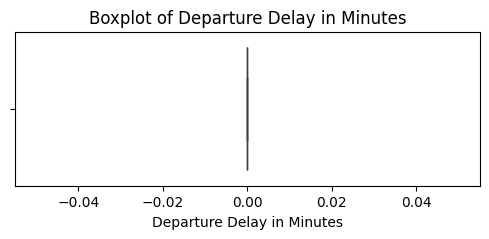

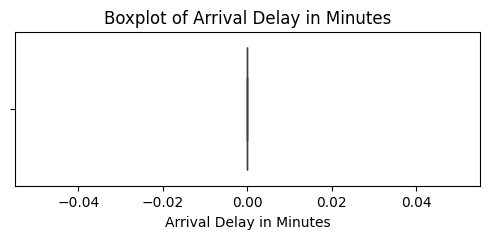

In [ ]:
cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

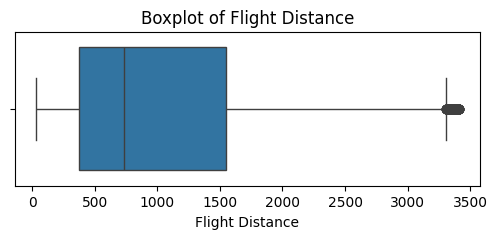

In [ ]:
cols = ['Flight Distance']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
columns_to_check = ['Flight Distance']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")


Outliers removed from Flight Distance


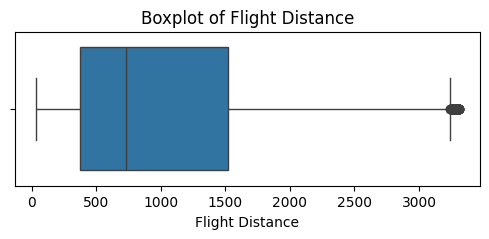

In [ ]:
cols = ['Flight Distance']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
df.shape

(44887, 25)

In [ ]:

q3 = data['Flight Distance'].quantile(.75)
q1 = data['Flight Distance'].quantile(.25)
iqr = q3-q1
iqr

np.float64(1329.0)

In [ ]:
# prompt: generate the count of outliers in flight distance

Q1 = data['Flight Distance'].quantile(0.25)
Q3 = data['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Flight Distance'] < lower_bound) | (data['Flight Distance'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in 'Flight Distance': {num_outliers}")

Number of outliers in 'Flight Distance': 2291


In [ ]:
columns_to_check = ['Flight Distance']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")

Outliers removed from Flight Distance


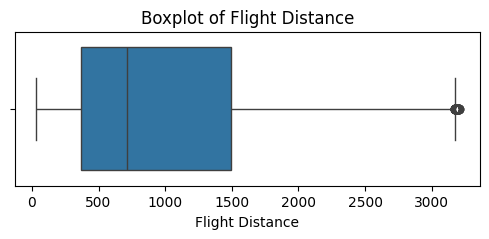

Number of outliers in 'Flight Distance': 2291


In [ ]:
cols = ['Flight Distance']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

print(f"Number of outliers in 'Flight Distance': {num_outliers}")

Removed 115 outliers from Flight Distance using IQR.
Shape after removing outliers from 'Flight Distance': (44387, 25)


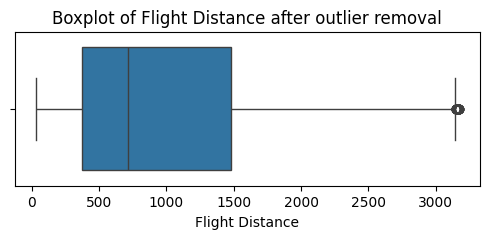

In [ ]:
# prompt: remove the number of outliers in 'Flight Distance': 2291 using iqr method

# Re-calculating and removing outliers from 'Flight Distance' after previous removals
columns_to_check = ['Flight Distance']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the current df
    outliers_in_current_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers_in_current_df = outliers_in_current_df.shape[0]

    # Remove outliers from the current df
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Removed {num_outliers_in_current_df} outliers from {col} using IQR.")

# Display shape after removal
print(f"Shape after removing outliers from 'Flight Distance': {df.shape}")

# Plotting the boxplot again to show the effect of removal
cols = ['Flight Distance']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()

In [ ]:
outliers=[]
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np

    for i in data:
      z_score = (i-mean)/std
      if (np.abs(z_score) > thres):
        outliers.append(i)
    return outliers
outliers=[]

In [ ]:
num_outliers_in_current_df

115

In [ ]:
upper_limit = df['Flight Distance'].mean() + 3 * df['Flight Distance'].std()
lower_limit = df['Flight Distance'].mean() - 3 * df['Flight Distance'].std()
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 3373.846263828525
Lower Limit: -1386.011041804058


In [ ]:
df.loc[(df['Flight Distance'] > upper_limit) | (df['Flight Distance'] < lower_limit), 'Flight Distance']
df_head


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# prompt: find the outliers using loc function of flight distance

# Identify outliers using loc based on the calculated Z-score limits
outliers_loc = df.loc[(df['Flight Distance'] > upper_limit) | (df['Flight Distance'] < lower_limit), 'Flight Distance']

print("Outliers in 'Flight Distance' identified using .loc based on Z-score:")
print(outliers_loc)
print(f"Number of outliers found using .loc based on Z-score: {outliers_loc.shape[0]}")

Outliers in 'Flight Distance' identified using .loc based on Z-score:
465       3165.0
1329      3159.0
1901      3161.0
2666      3169.0
3571      3150.0
           ...  
99942     3162.0
101018    3164.0
101123    3169.0
101841    3152.0
103169    3157.0
Name: Flight Distance, Length: 111, dtype: float64
Number of outliers found using .loc based on Z-score: 111


In [ ]:
df.head(30)
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [ ]:
len(df)

44387

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44387 entries, 2 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             44387 non-null  int64  
 1   Customer Type                      44387 non-null  int64  
 2   Age                                44387 non-null  int64  
 3   Type of Travel                     44387 non-null  int64  
 4   Flight Distance                    44387 non-null  float64
 5   Inflight wifi service              44387 non-null  int64  
 6   Departure/Arrival time convenient  44387 non-null  int64  
 7   Ease of Online booking             44387 non-null  int64  
 8   Gate location                      44387 non-null  int64  
 9   Food and drink                     44387 non-null  int64  
 10  Online boarding                    44387 non-null  int64  
 11  Seat comfort                       44387 non-null  int64  

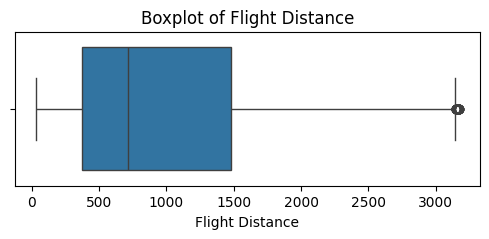

In [ ]:
cols = ['Flight Distance']
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
q1=df['Flight Distance'].quantile(0.25)
q3=df['Flight Distance'].quantile(0.75)
iqr=q3-q1
iqr

np.float64(1111.0)

In [ ]:
q1,q3,iqr

(np.float64(370.0), np.float64(1481.0), np.float64(1111.0))

In [ ]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 3147.5
Lower Limit: -1296.5


<Axes: ylabel='Flight Distance'>

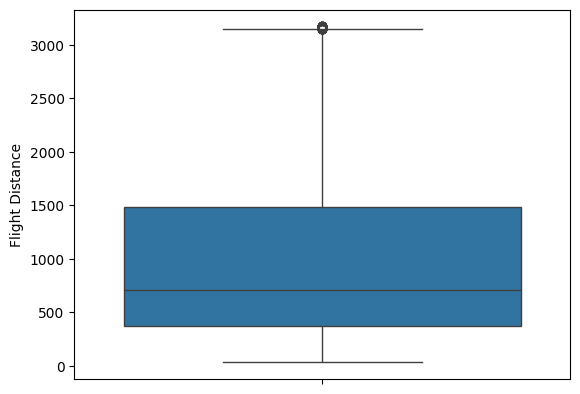

In [ ]:
sns.boxplot(df['Flight Distance'])

In [ ]:
outliers_loc = df.loc[(df['Flight Distance'] > upper_limit) | (df['Flight Distance'] < lower_limit), 'Flight Distance']

print("Outliers in 'Flight Distance' identified using .loc based on Z-score:")
print(outliers_loc)
print(f"Number of outliers found using .loc based on Z-score: {outliers_loc.shape[0]}")

Outliers in 'Flight Distance' identified using .loc based on Z-score:
465       3165.0
1329      3159.0
1901      3161.0
2666      3169.0
3571      3150.0
           ...  
99942     3162.0
101018    3164.0
101123    3169.0
101841    3152.0
103169    3157.0
Name: Flight Distance, Length: 111, dtype: float64
Number of outliers found using .loc based on Z-score: 111


Removed 111 outliers from 'Flight Distance' using IQR.
Shape after removing outliers from 'Flight Distance': (44276, 25)


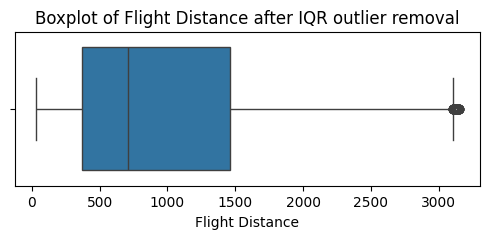

<Axes: ylabel='Flight Distance'>

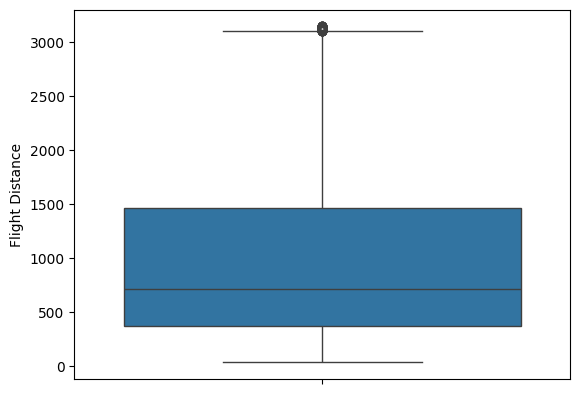

In [ ]:
# prompt: triming the outlier data of flight distance

# Re-calculate and remove outliers from 'Flight Distance' using the IQR method
Q1_flight = df['Flight Distance'].quantile(0.25)
Q3_flight = df['Flight Distance'].quantile(0.75)
IQR_flight = Q3_flight - Q1_flight

lower_bound_flight = Q1_flight - 1.5 * IQR_flight
upper_bound_flight = Q3_flight + 1.5 * IQR_flight

# Identify outliers based on the new IQR bounds
outliers_in_flight_distance_iqr = df[(df['Flight Distance'] < lower_bound_flight) | (df['Flight Distance'] > upper_bound_flight)]
num_outliers_in_flight_distance_iqr = outliers_in_flight_distance_iqr.shape[0]

# Remove outliers from the dataframe
df_trimmed_flight = df[(df['Flight Distance'] >= lower_bound_flight) & (df['Flight Distance'] <= upper_bound_flight)].copy()

print(f"Removed {num_outliers_in_flight_distance_iqr} outliers from 'Flight Distance' using IQR.")
print(f"Shape after removing outliers from 'Flight Distance': {df_trimmed_flight.shape}")

# Plotting the boxplot again to show the effect of removal
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_trimmed_flight['Flight Distance'])
plt.title('Boxplot of Flight Distance after IQR outlier removal')
plt.show()

# You can now use df_trimmed_flight for further analysis

sns.boxplot(df_trimmed_flight['Flight Distance'])


In [ ]:
new_df=df.copy()
new_df.loc[(new_df['Flight Distance'] > upper_limit), 'Flight Distance'] = upper_limit
new_df.loc[(new_df['Flight Distance'] < lower_limit), 'Flight Distance'] = lower_limit

(44387, 25)

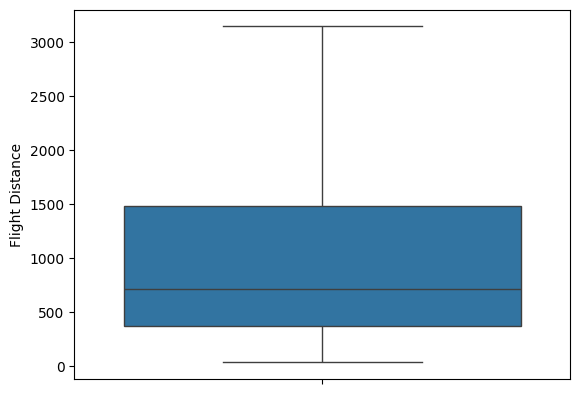

In [98]:
sns.boxplot(new_df['Flight Distance'])
new_df.shape


In [ ]:
# prompt: download the new_Df  file to pc

from google.colab import files
new_df.to_csv('new_Df.csv', index=False)
files.download('new_Df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

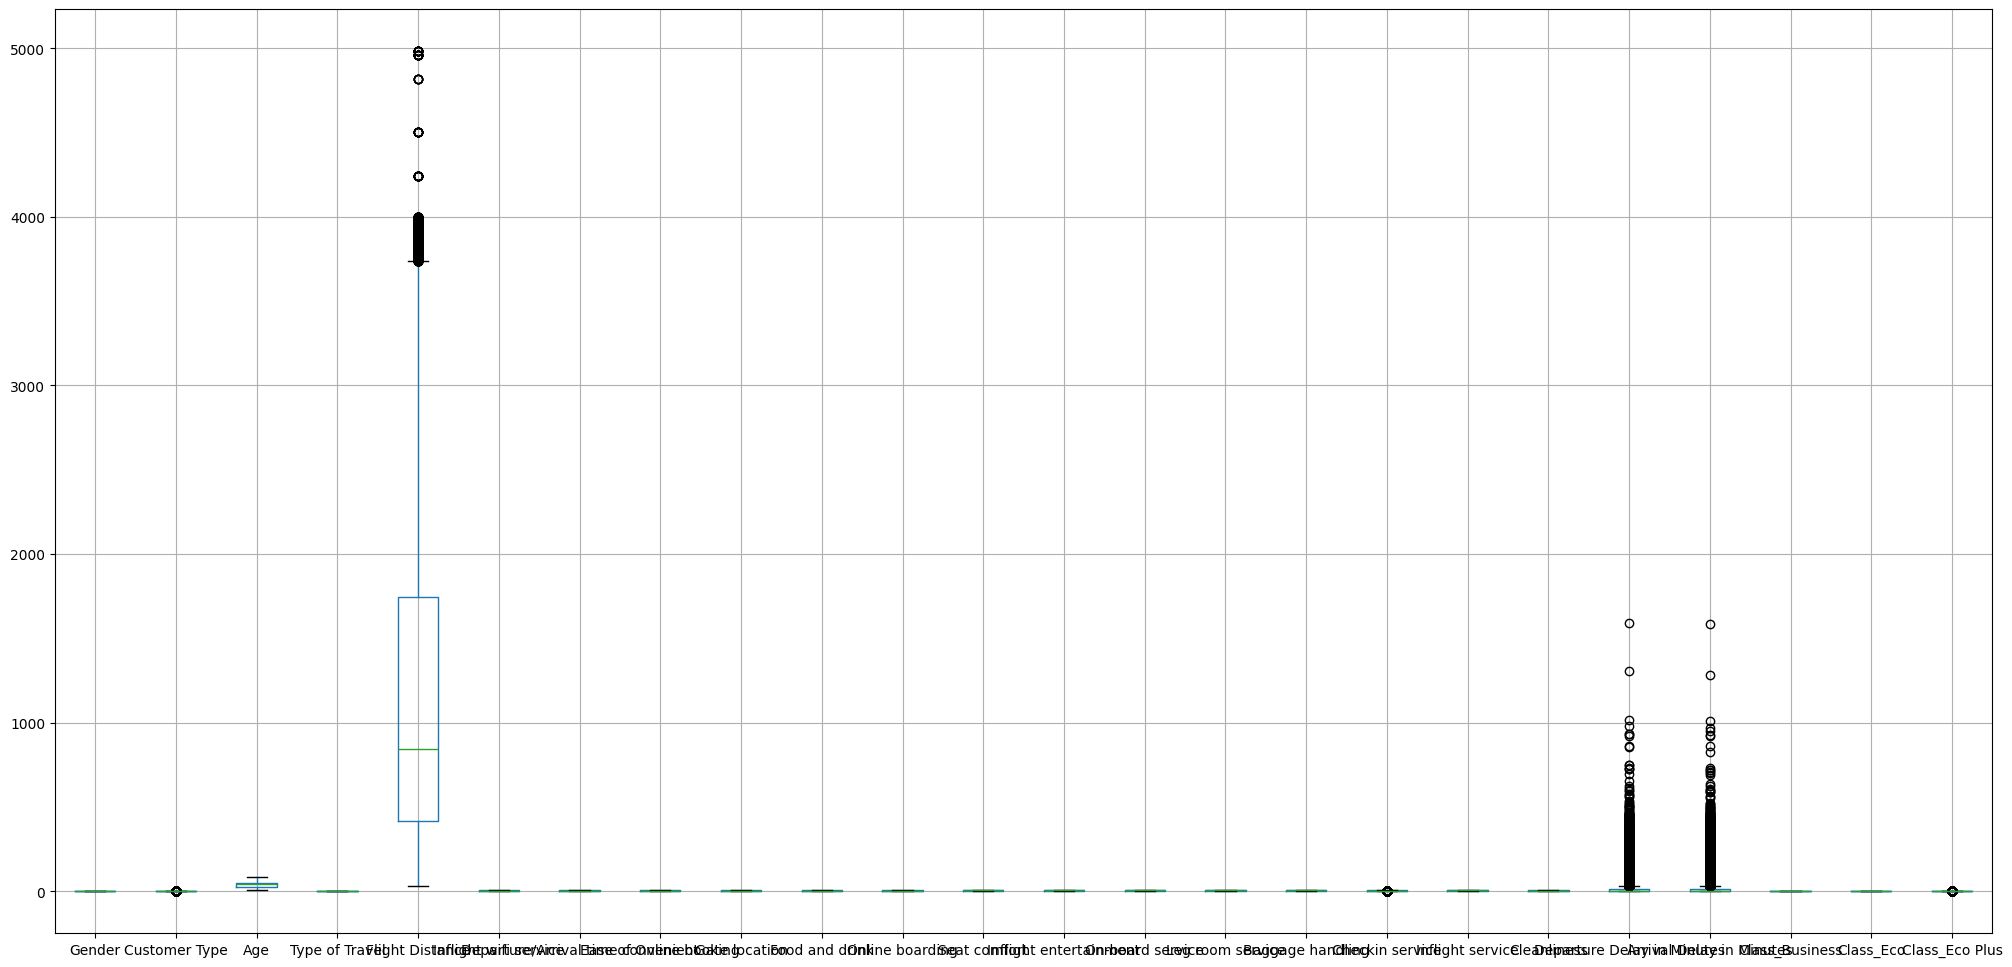

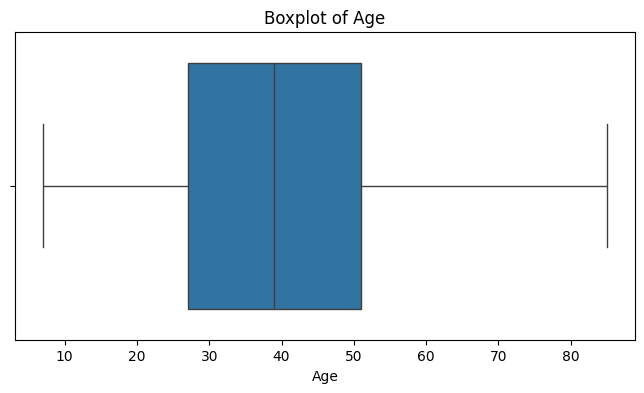

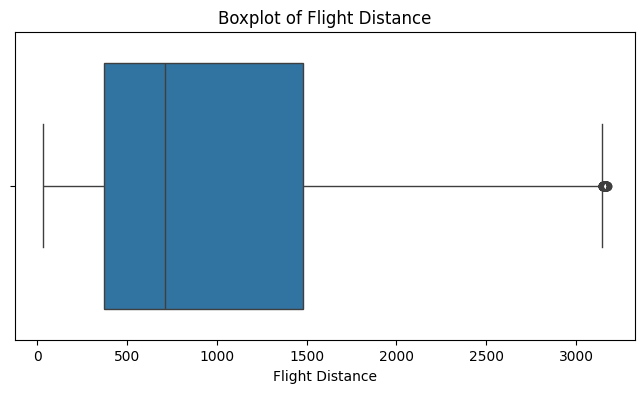

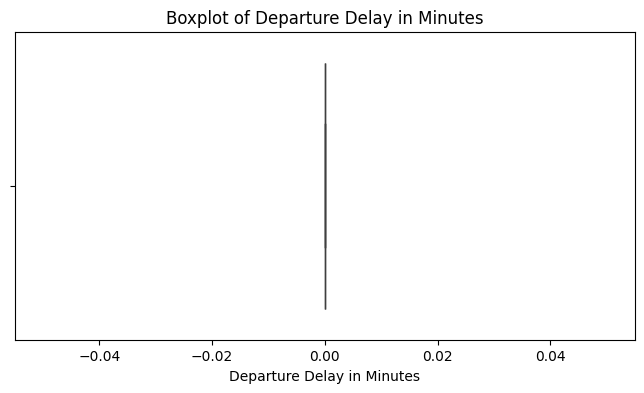

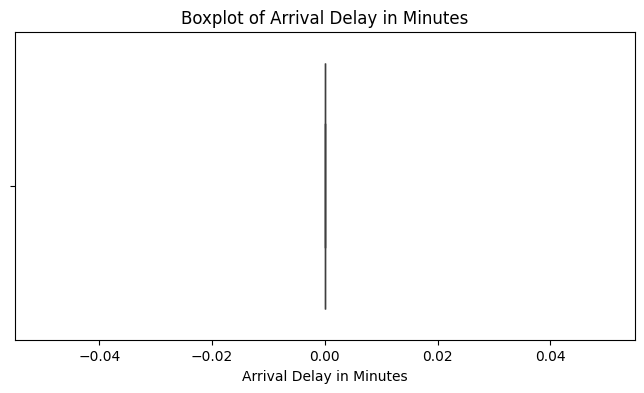

In [ ]:
# prompt: check the outliers in cols and show them in boxplot

cols_to_check_outliers = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in cols_to_check_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
pd.read_csv('/content/new_Df.csv')

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,26,0,1142.0,2,2,2,2,5,...,4,4,4,5,0,0,1,1,0,0
1,1,0,61,0,214.0,3,3,3,3,4,...,4,3,3,3,0,0,1,1,0,0
2,0,0,26,1,1180.0,3,4,2,1,1,...,4,4,4,1,0,0,0,0,1,0
3,0,0,41,0,853.0,1,2,2,2,4,...,1,4,1,2,0,0,0,1,0,0
4,1,1,20,0,1061.0,3,3,3,4,2,...,4,4,3,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1,0,57,0,867.0,4,5,5,5,4,...,3,1,3,4,0,0,0,0,1,0
44383,1,0,50,1,1620.0,3,1,3,4,2,...,4,2,4,2,0,0,0,0,1,0
44384,1,0,49,0,2347.0,4,4,4,4,2,...,5,5,5,4,0,0,1,1,0,0
44385,0,1,22,0,1000.0,1,1,1,5,1,...,1,5,4,1,0,0,0,0,1,0


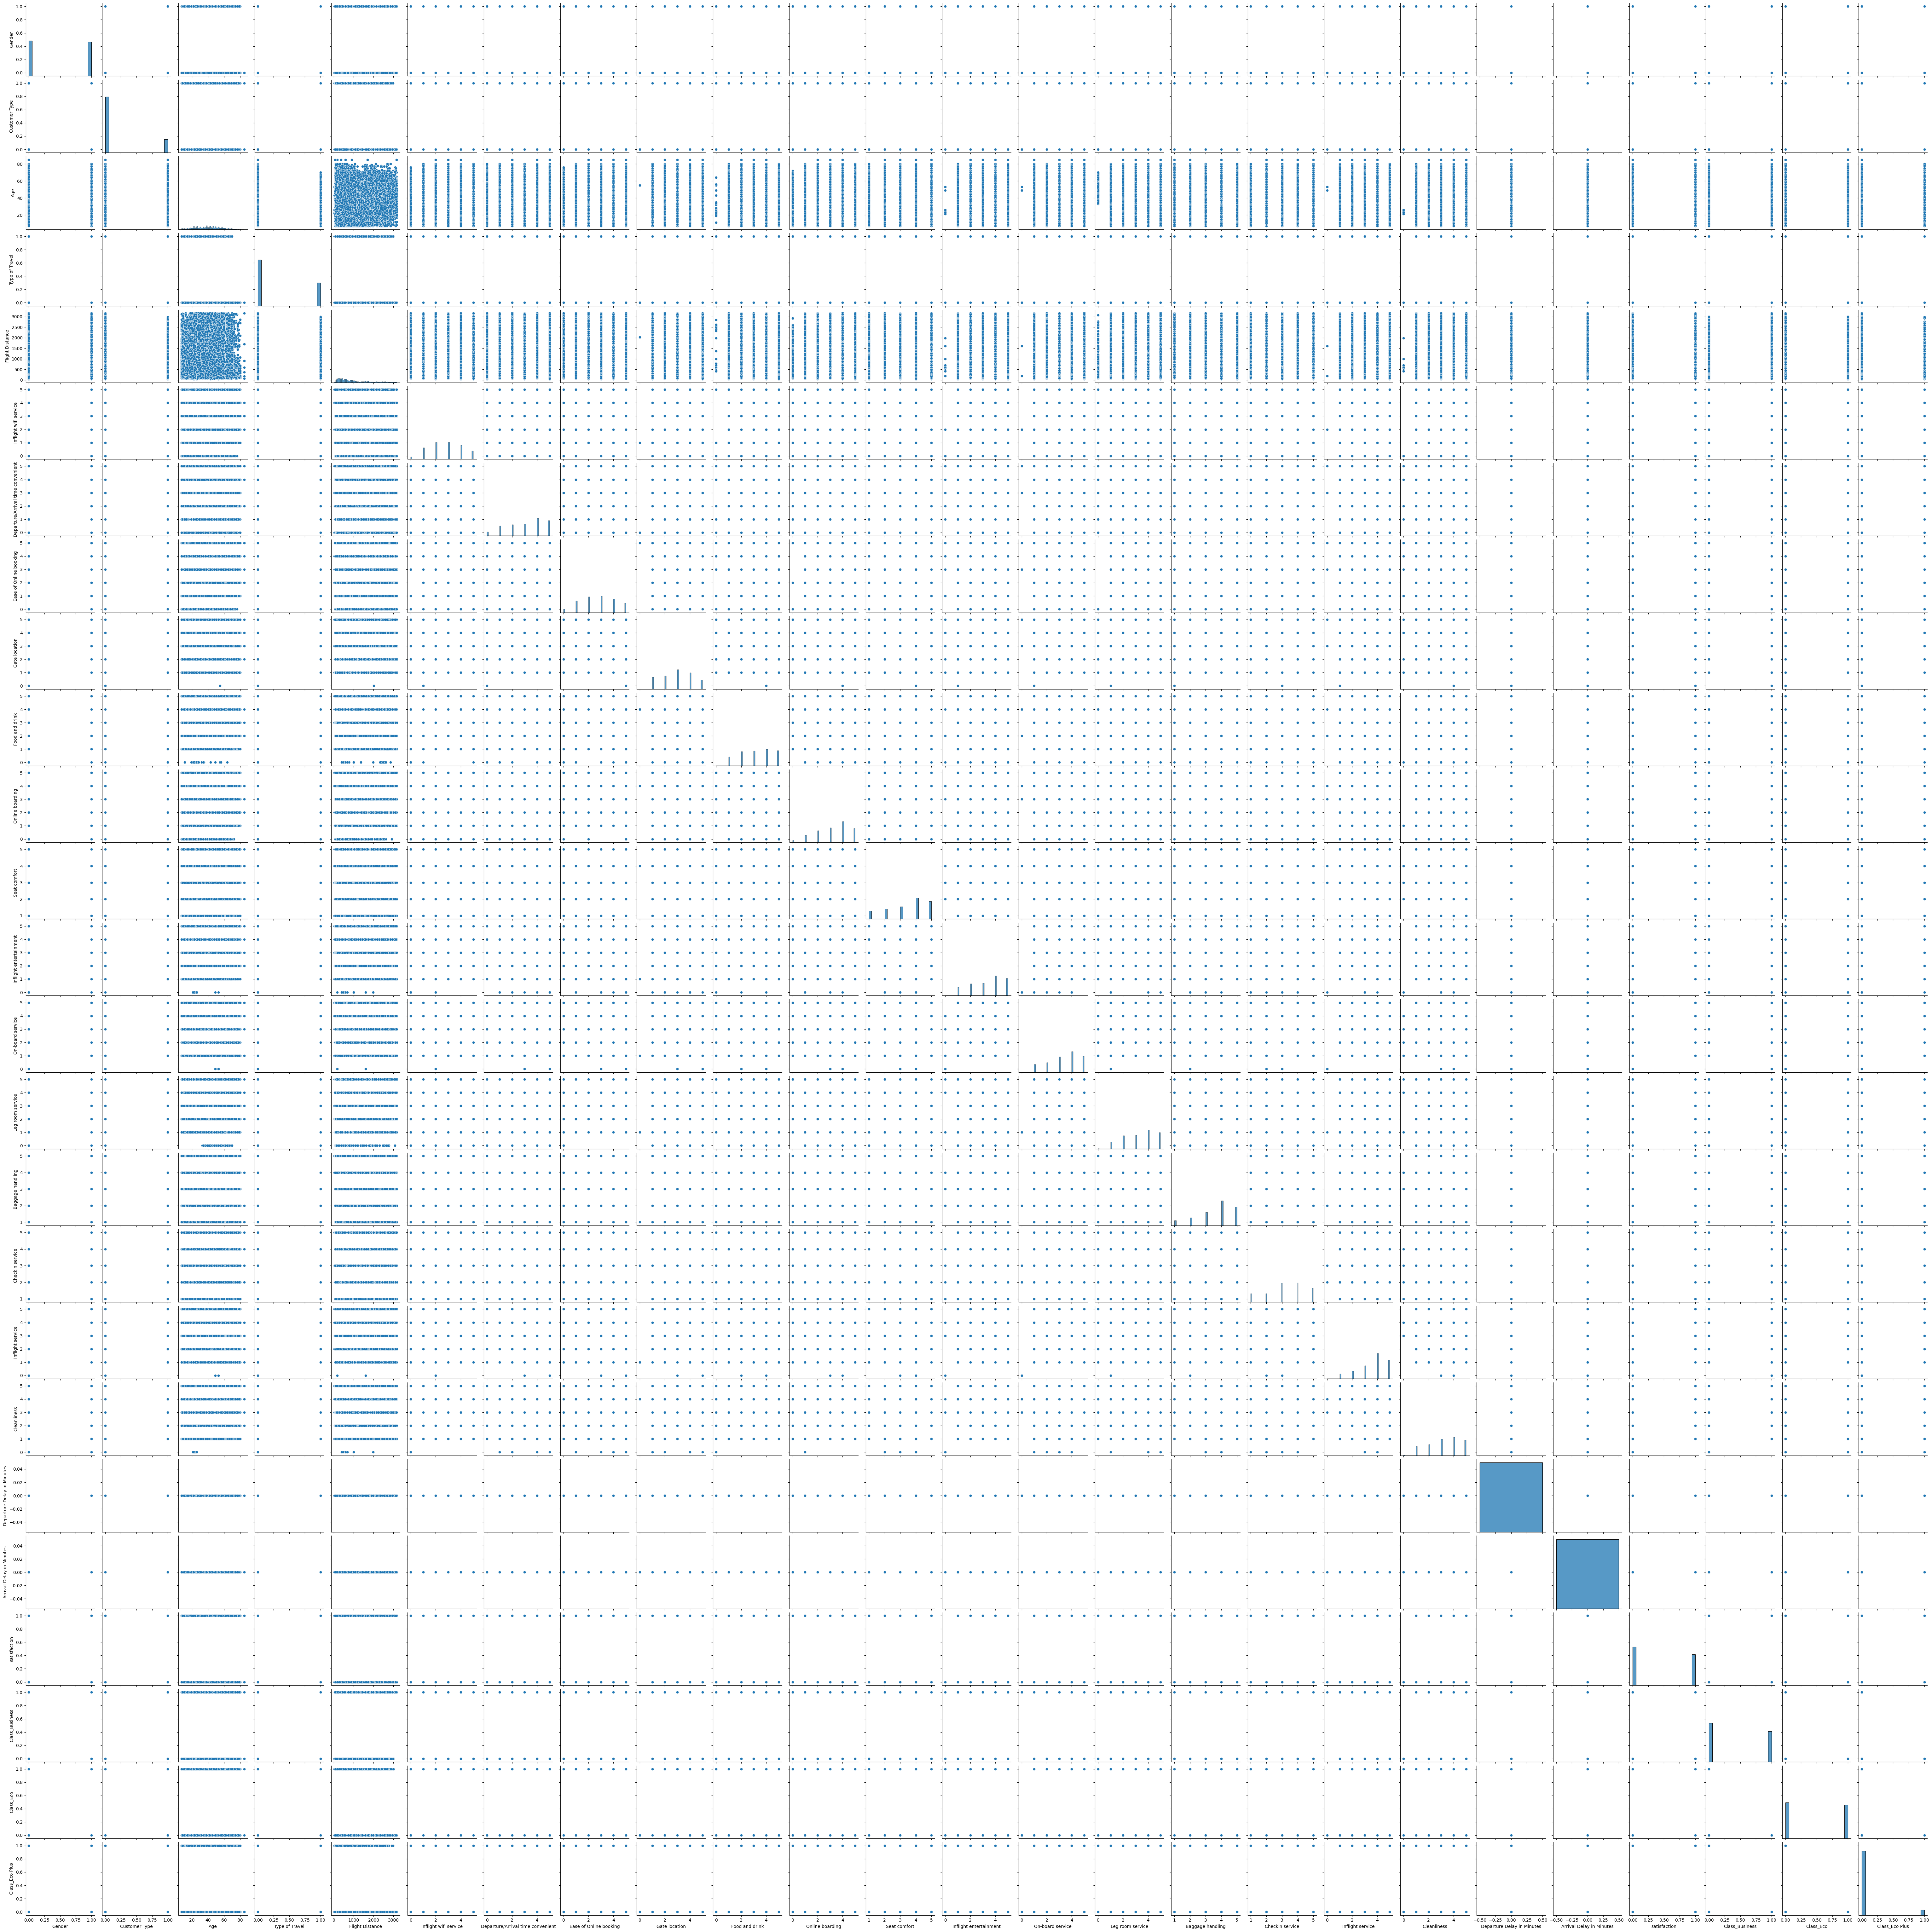

In [ ]:
sns.pairplot(df)